In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory as img_dir
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AvgPool2D, Flatten, Dense, Dropout

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(os.path.join(dirname))

import warnings
warnings.filterwarnings('ignore')

2024-03-12 19:11:20.530252: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 19:11:20.530346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 19:11:20.667721: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input
/kaggle/input/microsoft-catsvsdogs-dataset
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat


In [2]:
!nvidia-smi

Tue Mar 12 19:11:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
img = cv2.imread('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10022.jpg')

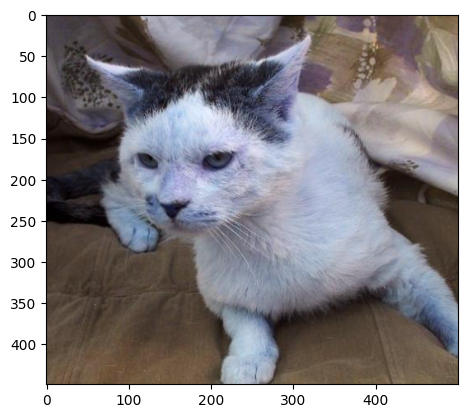

In [4]:
plt.imshow(img)

In [5]:
img.shape

(449, 500, 3)

In [6]:
data_dir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'
img_height = 100
img_width = 100

In [7]:
# First Section of the path
directory = r"/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"

# Second section of the path
categories = ["Cat","Dog"]

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(directory, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


In [8]:
# Now shuffle the images 
random.shuffle(img_data)

In [9]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)
    
#Convert X and Y list into array
X=np.array(x, dtype = float)
Y=np.array(y, dtype = float)

In [10]:
X.shape

(24946, 100, 100, 3)

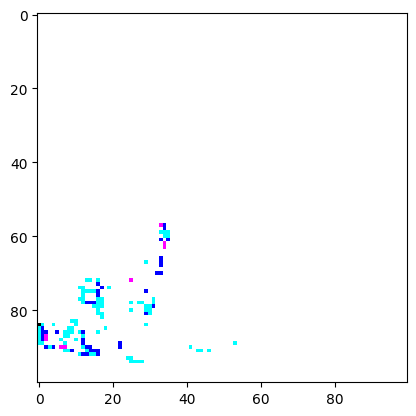

In [11]:
plt.imshow(X[19])

In [12]:
print(X[19])

[[[218. 206. 196.]
  [223. 211. 201.]
  [238. 226. 216.]
  ...
  [184. 186. 187.]
  [182. 184. 185.]
  [173. 175. 176.]]

 [[217. 205. 197.]
  [206. 193. 185.]
  [220. 207. 199.]
  ...
  [210. 212. 213.]
  [207. 209. 210.]
  [196. 198. 199.]]

 [[213. 203. 197.]
  [202. 192. 185.]
  [208. 198. 191.]
  ...
  [249. 251. 252.]
  [240. 242. 243.]
  [227. 229. 230.]]

 ...

 [[121. 139. 171.]
  [126. 149. 171.]
  [111. 131. 156.]
  ...
  [ 62.  74.  92.]
  [ 58.  70.  88.]
  [ 60.  69.  83.]]

 [[123. 141. 172.]
  [138. 158. 189.]
  [116. 140. 170.]
  ...
  [ 61.  75.  94.]
  [ 60.  74.  93.]
  [ 63.  75.  93.]]

 [[125. 143. 175.]
  [129. 149. 180.]
  [142. 166. 196.]
  ...
  [ 63.  77.  96.]
  [ 61.  75.  94.]
  [ 64.  76.  94.]]]


In [13]:
for i in range(len(X)):
    X[i] = X[i]/255.0

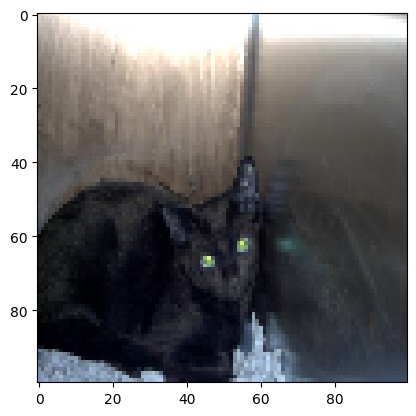

In [14]:
plt.imshow(X[19])

In [15]:
print(X[19])

[[[0.85490196 0.80784314 0.76862745]
  [0.8745098  0.82745098 0.78823529]
  [0.93333333 0.88627451 0.84705882]
  ...
  [0.72156863 0.72941176 0.73333333]
  [0.71372549 0.72156863 0.7254902 ]
  [0.67843137 0.68627451 0.69019608]]

 [[0.85098039 0.80392157 0.77254902]
  [0.80784314 0.75686275 0.7254902 ]
  [0.8627451  0.81176471 0.78039216]
  ...
  [0.82352941 0.83137255 0.83529412]
  [0.81176471 0.81960784 0.82352941]
  [0.76862745 0.77647059 0.78039216]]

 [[0.83529412 0.79607843 0.77254902]
  [0.79215686 0.75294118 0.7254902 ]
  [0.81568627 0.77647059 0.74901961]
  ...
  [0.97647059 0.98431373 0.98823529]
  [0.94117647 0.94901961 0.95294118]
  [0.89019608 0.89803922 0.90196078]]

 ...

 [[0.4745098  0.54509804 0.67058824]
  [0.49411765 0.58431373 0.67058824]
  [0.43529412 0.51372549 0.61176471]
  ...
  [0.24313725 0.29019608 0.36078431]
  [0.22745098 0.2745098  0.34509804]
  [0.23529412 0.27058824 0.3254902 ]]

 [[0.48235294 0.55294118 0.6745098 ]
  [0.54117647 0.61960784 0.74117647]


In [16]:
X.shape

(24946, 100, 100, 3)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [18]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size = 0.3)

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(128, (3, 3), padding = 'same', input_shape = X.shape[1: ], activation = 'tanh'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'tanh'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'tanh'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 50, 50, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 25, 25, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2000)           │    36,866,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     2,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,166,753 (149.41 MB)

 Trainable params: 39,166,753 (149.41 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 10)

Epoch 1/10
 10/546 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4419 - loss: 0.7050 

I0000 00:00:1710270915.843780      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710270915.862845      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


546/546 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5216 - loss: 0.6911

W0000 00:00:1710270929.263626      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710270930.575714      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


546/546 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.5216 - loss: 0.6911 - val_accuracy: 0.5283 - val_loss: 0.7017
Epoch 2/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5957 - loss: 0.6683 - val_accuracy: 0.6468 - val_loss: 0.6361
Epoch 3/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6308 - loss: 0.6399 - val_accuracy: 0.6036 - val_loss: 0.6637
Epoch 4/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6705 - loss: 0.6104 - val_accuracy: 0.6027 - val_loss: 0.6798
Epoch 5/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6834 - loss: 0.5925 - val_accuracy: 0.6459 - val_loss: 0.6140
Epoch 6/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6983 - loss: 0.5777 - val_accuracy: 0.7118 - val_loss: 0.5692
Epoch 7/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7142 - loss: 0.5605 - val_accuracy: 0.6998 - val_loss: 0.5762
Epoch 8/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7224 - loss: 0.5475 - val_accurac

In [24]:
model.evaluate(x_test, y_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7555 - loss: 0.5009


W0000 00:00:1710271029.238774      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.504908561706543, 0.7522428035736084]

In [25]:
result = model.predict(x_test)

 27/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

W0000 00:00:1710271031.705837      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


W0000 00:00:1710271033.025405      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [26]:
print(result[30])

[0.3983374]


In [27]:
y_test[30]

1.0

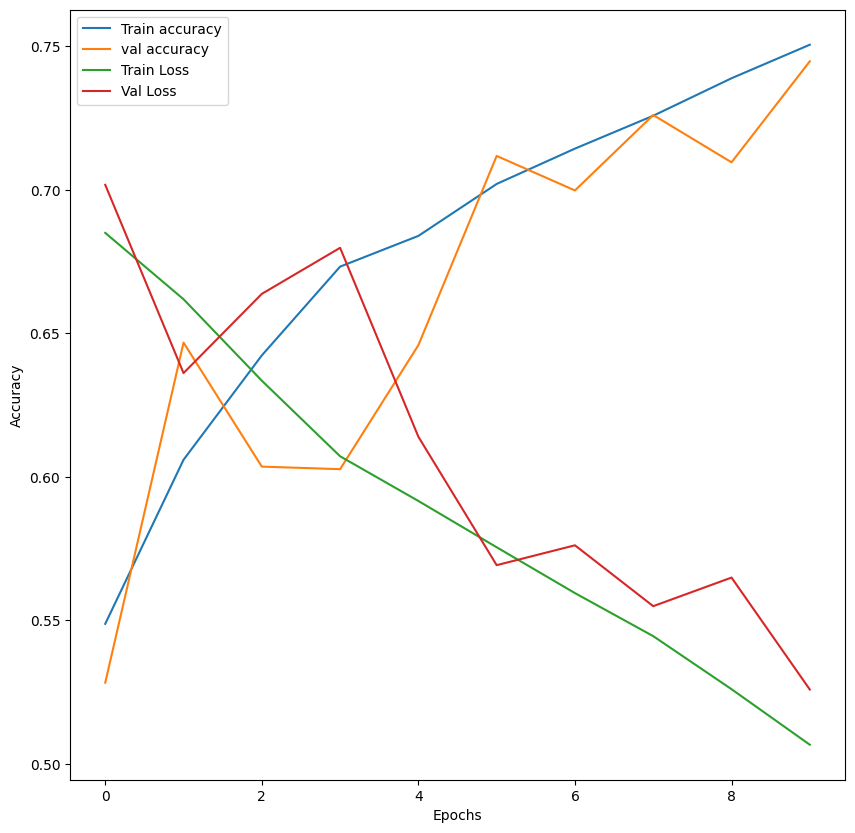

In [28]:
plt.figure(figsize = (10, 10))
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')